<a href="https://colab.research.google.com/github/Viny2030/UMSA/blob/main/bds_evaluacion_003_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20Scikit-learn.png?raw=true">
</p>

 # **<font color="DeepPink">Métricas de evaluación del desempeño: Clasificación</font>**

<p align="justify">
En problemas de clasificación, se utilizan diversas métricas de evaluación para medir la efectividad y el rendimiento de los modelos predictivos. Estas métricas son esenciales para comparar diferentes modelos y seleccionar el más adecuado para una tarea de clasificación específica.
<br><br>
Algunas de las métricas más comunes utilizadas en problemas de clasificación incluyen: <b>Accuracy, Precision, Recall, F1-Score, Matriz de Confusión, Cohen's kappa coefficient y Matthews correlation coefficient (MCC)</b>.
<br><br>
La elección de la métrica de evaluación en un problema de clasificación debe depender de la naturaleza del problema, las implicaciones de los falsos positivos y falsos negativos, y los objetivos específicos de la aplicación. Cada métrica proporciona una perspectiva única sobre el rendimiento del modelo y puede ser más relevante según el contexto.






 # **<font color="DeepPink">Carga de las librerías básicas</font>**

In [1]:
import numpy as np
import pandas as pd

In [2]:
import plotly.express as px

 # **<font color="DeepPink">Conjunto de datos</font>**

In [3]:
url = "https://raw.githubusercontent.com/cristiandarioortegayubro/BDS/main/datasets/income.csv"

In [4]:
df = pd.read_csv(url)

In [5]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income >50K
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      30718 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  31978 non-null  object
 13  income >50K     32561 non-null  int64 
dtypes: int64(6), object(8)
memory usage: 3.5+ MB


 ## **<font color="DeepPink">Separamos la variable objetivo y las variables explicativas</font>**

In [7]:
y = df['income >50K']

In [8]:
X = df.drop(columns='income >50K')
X.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


 ## **<font color="DeepPink">Preprocesamiento de variables categóricas con `sklearn`</font>**

In [9]:
from sklearn.compose import make_column_selector as selector

In [10]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

In [11]:
numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

In [12]:
numerical_columns

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [13]:
categorical_columns

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [14]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [15]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [16]:
from sklearn.compose import ColumnTransformer

In [17]:
preprocessor = ColumnTransformer(
                    [('one-hot-encoding',
                      OneHotEncoder(handle_unknown='ignore',
                                    sparse_output=False),
                      categorical_columns)],
                    remainder='passthrough')

In [18]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('one-hot-encoding',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native-country'])])

 ## **<font color="DeepPink">División del conjunto de entrenamiento y prueba</font>**

👀 Dividimos en conjunto de entrenamiento y prueba

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=123)

 # **<font color="DeepPink">Gradient Boosting con histogramas para clasificación</font>**

 <p align="justify">
 La clase <code>HistGradientBoostingClassifier</code> de la biblioteca <code>sklearn</code> es un algoritmo de clasificación. Este algoritmo utiliza histogramas para discretizar las variables explicativas continuas en rangos discretos (<a href="https://en.wikipedia.org/wiki/Data_binning">estrategia de binning</a>). Esto permite reducir la complejidad computacional, ya que el proceso de búsqueda de variables predictoras óptimas para cada división se realiza sobre los bins, lo que suele ser más rápido que considerar cada valor único de la variable predictora. Esto hace que el proceso de entrenamiento sea más eficiente, especialmente en conjuntos de datos grandes. Puede encontrarse una descripción detallada de todos los hiperparámetros en <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html"> sklearn.ensemble.HistGradientBoostingClassifier</a>.

In [20]:
from sklearn.ensemble import HistGradientBoostingClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

<p align="justify">
Se crea un modelo de Gradient Boosting con histogramas para clasificación utilizando la biblioteca  <code>sklearn</code>. Se consideran los hiperparámetros por defecto que trae el algoritmo.

In [21]:
model = make_pipeline(preprocessor,
                      HistGradientBoostingClassifier(random_state = 123))
model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot-encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('histgradientboostingclassifier',
                 HistGradientBoostingClassifier(random_state=123))])

<p align="justify">
Una vez creado el modelo, se ajusta con los datos de entrenamiento: <code>X_train</code> (variables explicativas) e <code>y_train</code> (variable objetivo).

In [22]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot-encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('histgradientboostingclassifier',
                 HistGradientBoostingClassifier(random_state=123))])

<p align="justify">
Después de entrenar el modelo, se realizan las predicciones sobre nuevos datos (<code>X_test</code>).

In [23]:
prediction = model.predict(X_test)
prediction[:10]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

<p align="justify">
Por último, se evalua el rendimiento del modelo usando diferentes métricas.


 # **<font color="DeepPink">Randomforest con histogramas para clasificación</font>**

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
model1 = make_pipeline(preprocessor,
                      RandomForestClassifier(random_state = 123))
model1

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot-encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=123))])

In [29]:
model1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot-encoding',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=123))])

In [31]:
prediction1 = model1.predict(X_test)
prediction1[:10]

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1])

In [32]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_true = y_test,
                          y_pred = prediction1)
new_var = round(accuracy1, 4)
new_var

0.8504

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm1 = confusion_matrix(y_true = y_test,
                      y_pred = prediction1)
cm1

array([[5671,  494],
       [ 724, 1252]])

In [34]:
import plotly.express as px
fig = px.imshow(cm1,
                text_auto=True,
                labels=dict(x="Predict", y="True"),
                x=['0', '1'],
                y=['0 ', '1 '])
fig.update_coloraxes(showscale=False)
fig.show()

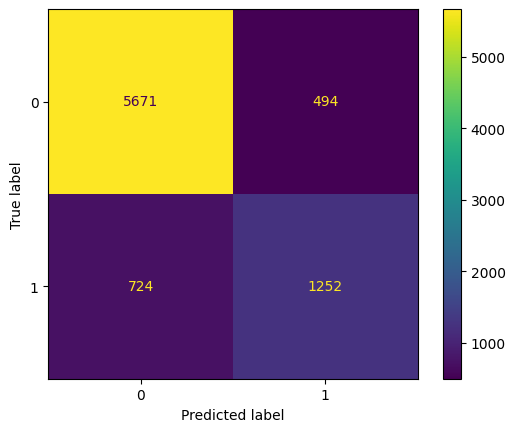

In [38]:
import matplotlib.pyplot as plt
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,                              # cm es la matriz de confusión calculada previamente.
                              display_labels=model1.classes_)                    # Es un atributo de un modelo entrenado que proporciona un array con las etiquetas de clase [0,1].
disp1.plot()

In [40]:
from sklearn.metrics import precision_score
precision1 = precision_score(y_true = y_test,
                      y_pred = prediction1)
precision1.round(2)

0.72

In [41]:
from sklearn.metrics import recall_score
recall1 = recall_score(y_true = y_test,
                      y_pred = prediction1)
recall1.round(2)

0.63

In [42]:
from sklearn.metrics import f1_score
f11 = f1_score(y_true = y_test,
              y_pred = prediction1)
f11.round(2)

0.67

In [46]:
from sklearn.metrics import cohen_kappa_score
kappa1 = cohen_kappa_score(y_test, prediction1)
kappa1.round(2)

0.58

In [48]:
from sklearn.metrics import matthews_corrcoef
mcc1 = matthews_corrcoef(y_true = y_test,
                        y_pred = prediction1)
mcc1.round(2)

0.58

In [51]:
# Método score
model1.score(X_test, y_test)

0.8503869303525365

In [52]:
# Parámetro scoring de cross_val_score
from sklearn.model_selection import cross_val_score
cv_results1 = cross_val_score(model1, X, y, scoring = 'accuracy', cv=5)
cv_results1.mean().round(2)

0.85

In [53]:
# Módulo Metrics (classification_report)
from sklearn.metrics import classification_report
report1 = classification_report(y_true = y_test,
                               y_pred = prediction1)
print(report1)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6165
           1       0.72      0.63      0.67      1976

    accuracy                           0.85      8141
   macro avg       0.80      0.78      0.79      8141
weighted avg       0.85      0.85      0.85      8141



 ## **<font color="DeepPink">Evaluación del modelo</font>**

<p align="justify">
Las métricas para los modelos de clasificación implican resumir la habilidad predictiva del modelo. Se puede evaluar la calidad de los modelos de clasificación con las siguientes <a href='https://scikit-learn.org/stable/modules/model_evaluation.html'>métricas</a>:



### **<font color="DeepPink">Accuracy**

<p align="justify">
La métrica llamada <i>accuracy</i> calcula la relación entre el número de predicciones correctas (cuando predicciones y valores reales coinciden) y el número total de predicciones realizadas por el modelo con el conjunto de prueba. Se mide el porcentaje de los casos que el modelo ha acertado.
<br>

$$Accuracy = \frac{Predicciones \ correctas}{Predicciones \ totales}$$

<br><p align="justify">
Documentación <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score'>sklearn.metrics.accuracy_score</a>

In [26]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_true = y_test,
                          y_pred = prediction)
new_var = round(accuracy, 4)
new_var

0.8745

<p align="justify">
Un valor de accuracy de 0.8745 significa que el modelo ha acertado el 87.45% de todas las predicciones realizadas, independientemente de si eran casos positivos o negativos.
<br><br>
Sin embargo, esta métrica, aunque es muy utilizada no distingue dos tipos de errores:
<ul align="justify">
<li>Falsos Positivos (<b>FP</b>): cuando la predicción dio 1, pero el valor real es 0.
<li>Falsos Negativos (<b>FN</b>): cuando la predicción dio 0, pero el valor real es 1.


### **<font color="DeepPink">Matriz de confusión (Confusion Matrix)**

<p align="justify">
Aunque existen diversos modelos teóricos, en la práctica se puede utilizar una tabla de doble entrada denominada matriz de confusión, la cual indica que tan confundido está el clasificador.

Documentación <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html'>sklearn.metrics.confusion_matrix</a>


In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true = y_test,
                      y_pred = prediction)
cm

array([[5671,  494],
       [ 724, 1252]])

In [36]:
import plotly.express as px
fig = px.imshow(cm,
                text_auto=True,
                labels=dict(x="Predict", y="True"),
                x=['0', '1'],
                y=['0 ', '1 '])
fig.update_coloraxes(showscale=False)
fig.show()

El siguiente código utiliza la biblioteca <code>matplotlib</code> para visualizar la matriz de confusión.

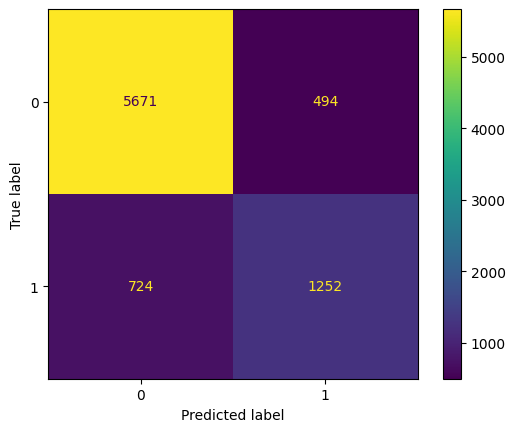

In [37]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(confusion_matrix=cm,                              # cm es la matriz de confusión calculada previamente.
                              display_labels=model.classes_)                    # Es un atributo de un modelo entrenado que proporciona un array con las etiquetas de clase [0,1].
disp.plot()

<p align="justify">
La matriz de confusión es una herramienta comúnmente utilizada para evaluar el rendimiento de un modelo de clasificación, especialmente cuando se trata de problemas de dos clases, como la clasificación binaria. En este ejemplo solo hay dos clases posibles: la clase 0 (income <= 50K) y la clase 1 (income > 50K).
<br>
<br>
En un modelo de clasificación binaria, los resultados de las predicciones se pueden resumir en cuatro términos:

<ol align="justify">
<li><b>Verdaderos positivos (VP)</b>: Representa el número de muestras que pertenecen a la clase 1 (positiva) y fueron clasificadas correctamente como clase 1.</li><br>
<li><b>Verdaderos negativos (VN)</b>: Representa el número de muestras que pertenecen a la clase 0 (negativa) y fueron clasificadas correctamente como clase 0.</li><br>
<li><b>Falsos positivos (FP)</b>: Representa el número de muestras que pertenecen a la clase 0 (negativa) pero fueron incorrectamente clasificadas como clase 1.</li><br>
<li><b>Falsos negativos (FN)</b>: Representa el número de muestras que pertenecen a la clase 1 (positiva) pero fueron incorrectamente clasificadas como clase 0.</li>

<p align="justify">
Este modelo clasifica como clase 1 (income > 50K) y efectivamente fue clase 1 (<b>Verdadero Positivo</b>) 1311 veces, por el contrario, clasificó como clase 0 (income <= 50K), pero el valor real fue clase 1 (<b>Falso Negativo</b>) 665 veces.
<br><br>
Complementariamente el modelo clasifica clase 0 (income <= 50K) y efectivamente fue clase 0 (<b>Verdadero Negativo</b>) 5808 veces, por el contrario, clasificó como clase 1 (income > 50K), pero el valor real fue clase 0 (<b>Falso Positivo</b>) 357 veces.
<br><br>
En resumen:
<ul align="justify">
<li>VP = 1311
<li>VN = 5808
<li>FP = 357
<li>FN = 665


### **<font color="DeepPink">Recall**

<p align="justify">
El nombre <i>recall</i> tiene su origen en el campo de la recuperación de información, el cual se centra en la extracción de información relevante a partir de conjuntos de grandes datos. Esta métrica establece una relación entre los <b>Verdaderos Positivos</b> y la totalidad de los elementos relevantes, es decir, aquellos valores que realmente son positivos (suma de <b>Verdaderos Positivos</b> y <b>Falsos Negativos</b>). Para su cálculo se utiliza la siguiente fórmula:
<br>

$$Recall=\frac{VP}{VP+FN}$$

Documentación <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score'>sklearn.metrics.recall_score</a>

In [43]:
from sklearn.metrics import recall_score
recall = recall_score(y_true = y_test,
                      y_pred = prediction)
recall.round(2)

0.63

<p align="justify">
En resumen, de todos los elementos que realmente son positivos, cuantas predicciones positivas realizó el modelo. Un recall de 0.66 indica que de todas las personas que realmente poseen ingresos superiorer a 55K (income > 50K), el 66% de ellas fueron detectadas correctamente por el modelo.

### **<font color="DeepPink">Precision**

<p align="justify">
Siguiendo la analogía de recuperación de la información, la <i>precision</i> relaciona los <b>Verdaderos Positivos</b> y todos los elementos recolectados, es decir, aquellas predicciones positivas (suma de <b>Verdaderos Positivos</b> y <b>Falsos Positivos</b>). Para su cálculo se utiliza la siguiente fórmula:
<br>

$$Precision=\frac{VP}{VP+FP}$$

Documentación <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score'>sklearn.metrics.precision_score</a>

In [44]:
from sklearn.metrics import precision_score
precision = precision_score(y_true = y_test,
                      y_pred = prediction)
precision.round(2)

0.72

<p align="justify">
En resumen, de todos los elementos que predijo el modelo como positivos, cuántos realmente son positivos. Una precision de 0.79 indica que de todas las personas que el modelo predijo que tienen ingresos superiorer a 55K (income > 50K), solo lo tienen realmente el 79%.  

### **<font color="DeepPink">F1-Score**

<p align="justify">
El puntaje F1 se utiliza para combinar las métricas de <i>Precision</i> y <i>Recall</i> en un sólo valor. Proporciona una forma de evaluar el equilibrio entre <i>Precision</i> y <i>Recall</i>.  Para su cálculo se utiliza la siguiente fórmula:


$$F1 = 2*\frac{Precision*Recall}{Precision+Recall}$$

Documentación <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score'>sklearn.metrics.f1_score</a>

In [45]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true = y_test,
              y_pred = prediction)
f1.round(2)

0.67

<p align="justify">
Un valor de F1-Score de 0.72 indica que el modelo tiene un buen equilibrio entre la Precisión y el Recall en sus predicciones. Además, este valor indica generalmente un desempeño satisfactorio del modelo de clasificación, sin embargo, el umbral se establece según el contexto del problema.

### **<font color="DeepPink">Kappa-Score**

<p align="justify">
El puntaje Kappa, conocido también como el coeficiente Kappa de Cohen, es una métrica utilizada para ajustar el efecto del azar en la proporción de concordancia o acuerdos observados entre las predicciones y los valores reales. Proporciona una medida más robusta que el simple cálculo del porcentaje de concordancia (<i>Accuracy</i>), ya que Kappa considera tanto el acuerdo real como el acuerdo que podría ocurrir por azar. En otras palabras, evalúa cuánto mejor (o peor) es el acuerdo real en comparación con lo que podría ocurrir por azar. Para su cálculo se utiliza la siguiente fórmula:


$$Kappa = \frac{Pc-Pa}{1-Pa}$$

Donde:
- $Pc$ es la proporción de acuerdos observados (Accuracy).
- $Pa$ es la proporción de acuerdo esperados por azar.

<br><p align="justify">
Para calcular $Pa$, es decir, la probabilidad de que el acuerdo se deba al azar, es necesario tener en cuenta la <b>matriz de confusión</b>.
<br><br>
La medida de proporción de acuerdo esperado por azar para la clase 1 (income > 50K) refleja la probabilidad de que el nivel de concordancia entre el valor real y la predicción en la clase sea resultado del azar. Su cálculo implica sumar las filas y columnas correspondientes a la clase 1 en la matriz de confusión, dividiendo cada suma por el total de instancias en la matriz. Luego, estos valores se multiplican entre sí para obtener la proporción final para la clase: <br><br>

$$Pa(C_1) = \frac{1668}{8141}*\frac{1976}{8141}=0.05$$

<br><p align="justify">
Del mismo modo para calcular la proporción de acuerdo esperado por azar para la clase 0 (income <= 50K) se suman de las filas y columnas correspondientes a la clase 0 en la matriz de confusión, luego, se divide cada una de estas sumas por el total de instancias en la matriz. Finalmente, se multiplican estos valores entre sí para obtener la proporción final asociada a la clase 0:<br><br>

$$Pa(C_0) = \frac{6473}{8141}*\frac{6165}{8141}=0.60$$

<br><p align="justify">
Teniendo en cuenta lo anterior, el valor de $Pa$ se calcula como la suma de la proporción de acuerdo esperado por azar para ambas clases:<br><br>

$$Pa = Pa(C_1)+Pa(C_0)=0.65$$

<br><p align="justify">
Aplicando los valores de $Pc$ y $Pa$ en la fórmula de Kappa de Cohen se obtiene:
<br><br>
$$Kappa = \frac{0.8765-0.65}{1-0.65}=0.64$$
<br>
Documentación <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.cohen_kappa_score.html#sklearn.metrics.cohen_kappa_score
'>sklearn.metrics.cohen_kappa_score</a>






In [47]:
from sklearn.metrics import cohen_kappa_score
kappa = cohen_kappa_score(y_test, prediction)
kappa.round(2)

0.58

<br><p align="justify">
El valor del puntaje Kappa varía entre -1 y +1, donde un valor positivo indica un acuerdo más allá del acuerdo esperado por azar, 0 indica acuerdo igual al azar y un valor negativo indica acuerdo peor que el azar. Un valor cercano a 1 indica un alto nivel de acuerdo, mientras que uno cercano a 0 sugiere un acuerdo limitado o esperado por azar. Un valor de kappa de 0.64 sugiere un acuerdo de moderado a alto.
<br><br>
En el ámbito de negocios, esto sugiere que hay un nivel razonable de acuerdo entre las predicciones realizadas por el modelo y los valores reales, más allá de lo que podría esperarse por azar.

### **<font color="DeepPink">MCC**

<br><p align="justify">
El coeficiente de correlación de Matthews (MCC por sus siglas en inglés), también conocido como coeficiente phi (φ), es una métrica de evaluación utilizada en problemas de clasificación binaria para medir la calidad de un modelo de clasificación. MCC es especialmente útil cuando las clases están desequilibradas. Al igual que el puntaje Kappa, el coeficiente MCC es una métrica robusta que considera la concordancia real entre predicciones y observaciones, ajustando el efecto del azar y proporcionando una evaluación más completa. Para su cálculo se utiliza la siguiente fórmula:
<br><br>

$$MCC=\frac{VP*VN-FP*FN}{\sqrt{ (VP+FP)(VP+FN)(VN+FP)(VN+FN) }}$$

<br><p align="justify">
Documentación <a href='https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html'>sklearn.metrics.matthews_corrcoef</a>


In [54]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_true = y_test,
                        y_pred = prediction)
mcc.round(2)

0.58

<p align="justify">
El MCC produce valores en el rango de -1 a +1. Un valor de +1 indica una clasificación perfecta, 0 indica una clasificación al azar y -1 indica una clasificación inversa perfecta. Un MCC de 0.64 sugiere que hay una correlación
de moderada a fuerte entre las predicciones y las observaciones reales en un problema de clasificación binaria. Esto significa que el modelo está haciendo predicciones que se correlacionan positivamente con los valores reales, aunque hay margen de mejora.

 ## **<font color="DeepPink">Evaluación del modelo con `sklearn`</font>**

<p align="justify">
Podemos calcular las métricas anteriores con <code>Sklearn</code> de formas diferntes:
<br><br><ul align="justify">
<li>Método <code>score</code>: todos los algoritmos incluyen un método <code>score</code> que provee el resultado de un criterio de evaluación por defecto para aquel problema al que están orientados. De esta manera, el método <code>score</code> de un modelo de clasificación devuelve el Accuracy.
<br><br>
<li>Parámetro <code>scoring</code>: algunas herramientas de evaluación de modelos que utilizan validación cruzada (como <code>cross_val_score</code> o <code>GridSeachCV</code>) incluyen sus propias métricas de rendimiento. Puede consultar las métricas disponibles en la <a href="https://scikit-learn.org/stable/modules/model_evaluation.html">documentación</a>.
<br><br>
<li>Módulo <code>metrics</code>: implementa un buen número de medidas de evaluación del modelo, incluyendo un reporte de métricas (<code>classification_report</code>).

In [56]:
# Método score
model.score(X_test, y_test)

0.8744625967325881

In [57]:
# Parámetro scoring de cross_val_score
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(model, X, y, scoring = 'accuracy', cv=5)
cv_results.mean().round(2)

0.87

In [58]:
# Módulo Metrics (classification_report)
from sklearn.metrics import classification_report
report = classification_report(y_true = y_test,
                               y_pred = prediction)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6165
           1       0.72      0.63      0.67      1976

    accuracy                           0.85      8141
   macro avg       0.80      0.78      0.79      8141
weighted avg       0.85      0.85      0.85      8141



<p align="justify">
El informe de clasificación generado por classification_report incluye varias métricas útiles que evalúan el rendimiento del modelo en términos de <i>precision</i>, <i>recall</i> y <i>F1-score</i> para cada clase en un problema de clasificación, no solo la clase positiva como vimos enteriormente.  

 # **<font color="DeepPink">Conclusiones</font>**

<p align="justify">
👀 En este colab nosotros:
<br><br>
✅ Cargamos los datos y le dimos estructura de <code>DataFrame</code> usando <code>Pandas</code>.<br>
✅ Generamos un modelo base de Gradient Boosting con histogramas para clasificación.
<br>
✅ Realizamos la predicción y evaluación, usando diferentes métricas, con un conjunto de prueba. <br>
✅ Calculamos la matriz de confusión y la graficamos.
<br>
✅ Generamos el reporte de metricas para clasificación.
<br>



<br>
<br>
<p align="center"><b>
💗
<font color="DeepPink">
Hemos llegado al final de nuestro colab, a seguir codeando...
</font>
</p>
